In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
url ="https://data.caltech.edu/records/mzrjq-6wc02/files/caltech-101.zip"
import requests
import zipfile
from io import BytesIO
from pathlib import Path

# src klasöründeyiz
SRC = Path().resolve()
EXTRACTED = SRC / "extracted_content" / "intel"

EXTRACTED.mkdir(parents=True, exist_ok=True)

response = requests.get(url, timeout=120)
response.raise_for_status()

with zipfile.ZipFile(BytesIO(response.content)) as z:
    z.extractall(EXTRACTED)

print("✅ Intel dataset extracted to:", EXTRACTED)

✅ Intel dataset extracted to: /workspaces/utku_machine-learning-python-template/src/extracted_content/intel


In [4]:

SRC = Path().resolve()
EXTRACTED = SRC / "extracted_content" / "intel"

In [5]:
from pathlib import Path
import os

SRC = Path().resolve()
EXTRACTED = SRC / "extracted_content" / "intel"

print("SRC =", SRC)
print("EXTRACTED =", EXTRACTED)
print("EXTRACTED exists? ->", EXTRACTED.exists())

if EXTRACTED.exists():
    items = list(EXTRACTED.iterdir())
    print("Items count:", len(items))
    for p in items[:30]:
        print(" -", p.name)
else:
    print("❌ Folder does not exist. You extracted somewhere else.")

SRC = /workspaces/utku_machine-learning-python-template/src
EXTRACTED = /workspaces/utku_machine-learning-python-template/src/extracted_content/intel
EXTRACTED exists? -> True
Items count: 2
 - caltech-101
 - __MACOSX


In [6]:
from pathlib import Path

SRC = Path().resolve()
print("SRC:", SRC)

splits_dir = SRC / "splits"
print("splits exists?", splits_dir.exists())
if splits_dir.exists():
    print("splits content:", [p.name for p in splits_dir.iterdir()])

# Caltech split var mı?
caltech_dir = splits_dir / "caltech-101"
print("caltech split exists?", caltech_dir.exists())
if caltech_dir.exists():
    print("caltech content:", [p.name for p in caltech_dir.iterdir()])

SRC: /workspaces/utku_machine-learning-python-template/src
splits exists? True
splits content: ['caltech-101']
caltech split exists? True
caltech content: ['test', 'val', 'train']


In [7]:
import tarfile
from pathlib import Path

SRC = Path().resolve()
BASE = SRC / "extracted_content" / "intel" / "caltech-101"
tar_path = BASE / "101_ObjectCategories.tar.gz"

print("Tar exists?", tar_path.exists(), tar_path)

with tarfile.open(tar_path, "r:gz") as tar:
    tar.extractall(path=BASE)

print("✅ Extracted 101_ObjectCategories into:", BASE)
print("Now BASE content:", [p.name for p in BASE.iterdir()])


Tar exists? True /workspaces/utku_machine-learning-python-template/src/extracted_content/intel/caltech-101/101_ObjectCategories.tar.gz
✅ Extracted 101_ObjectCategories into: /workspaces/utku_machine-learning-python-template/src/extracted_content/intel/caltech-101
Now BASE content: ['Annotations.tar', '101_ObjectCategories', 'show_annotation.m', '101_ObjectCategories.tar.gz']


In [8]:
import random, shutil
from pathlib import Path

SEED = 1337
SPLIT = (0.8, 0.1, 0.1)
ALLOWED_EXTS = {".jpg", ".jpeg", ".png", ".bmp", ".webp"}

SRC = Path().resolve()
DATASET = SRC / "extracted_content" / "intel" / "caltech-101" / "101_ObjectCategories"

OUT_ROOT = SRC / "splits" / "caltech-101"
OUT_TRAIN, OUT_VAL, OUT_TEST = OUT_ROOT/"train", OUT_ROOT/"val", OUT_ROOT/"test"

def is_image(p: Path):
    return p.is_file() and p.suffix.lower() in ALLOWED_EXTS

classes = [d for d in DATASET.iterdir() if d.is_dir() and not d.name.startswith(".")]
print("Found classes:", len(classes))
print("Example classes:", [d.name for d in classes[:10]])

rng = random.Random(SEED)

# klasörleri oluştur
for base in (OUT_TRAIN, OUT_VAL, OUT_TEST):
    for d in classes:
        (base / d.name).mkdir(parents=True, exist_ok=True)

# split + kopyalama
for d in classes:
    files = [p for p in d.iterdir() if is_image(p)]
    if len(files) < 5:
        continue

    rng.shuffle(files)
    n = len(files)
    n_train = int(n * SPLIT[0])
    n_val = int(n * SPLIT[1])

    tr = files[:n_train]
    va = files[n_train:n_train+n_val]
    te = files[n_train+n_val:]

    for f in tr: shutil.copy2(f, OUT_TRAIN/d.name/f.name)
    for f in va: shutil.copy2(f, OUT_VAL/d.name/f.name)
    for f in te: shutil.copy2(f, OUT_TEST/d.name/f.name)

print("✅ Split created at:", OUT_ROOT)

Found classes: 102
Example classes: ['helicopter', 'stapler', 'emu', 'Motorbikes', 'sunflower', 'flamingo_head', 'bass', 'crab', 'mayfly', 'platypus']


✅ Split created at: /workspaces/utku_machine-learning-python-template/src/splits/caltech-101


In [9]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import tensorflow as tf
from tensorflow import keras

2026-01-19 06:07:27.289579: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-19 06:07:28.496911: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-19 06:07:31.780146: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [11]:
img_size = (224,224)
batch_size =32

train_ds = keras.utils.image_dataset_from_directory("splits/caltech-101/train",
    image_size= img_size,
    batch_size = batch_size,
    label_mode ='int',
    shuffle=True,
)
val_ds = keras.utils.image_dataset_from_directory("splits/caltech-101/val",
    image_size=img_size,
    batch_size=batch_size,
    label_mode="int",
    shuffle=True,
)
test_ds = keras.utils.image_dataset_from_directory(  "splits/caltech-101/val",
    image_size = img_size,
    batch_size=batch_size,
    label_mode='int',
    shuffle = True,
    )


Found 7280 files belonging to 102 classes.
Found 866 files belonging to 102 classes.
Found 866 files belonging to 102 classes.


2026-01-19 06:07:32.939514: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras import layers

In [14]:
num_classes = len(train_ds.class_names)
print(num_classes)  # 102 görme

102


In [15]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import vgg16  # ✅ buradan preprocess_input gelir

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False

num_classes = len(train_ds.class_names)

model = keras.Sequential([
    layers.Input((224,224,3)),
    layers.Lambda(vgg16.preprocess_input),   # ✅ doğru
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax"),
])


In [16]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [17]:
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [18]:
model.fit(test_ds,epochs=5,batch_size=8,validation_data=val_ds)

Epoch 1/5


2026-01-19 06:07:35.178921: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 411041792 exceeds 10% of free system memory.
2026-01-19 06:07:35.755640: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 411041792 exceeds 10% of free system memory.
2026-01-19 06:07:37.482384: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 102760448 exceeds 10% of free system memory.
2026-01-19 06:07:37.560193: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 205520896 exceeds 10% of free system memory.
2026-01-19 06:07:38.306656: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 205520896 exceeds 10% of free system memory.


19/28 ━━━━━━━━━━━━━━━━━━━━ 1:44 12s/step - accuracy: 0.1915 - loss: 15.8047

KeyboardInterrupt: 

In [19]:
train_ds_2 = train_ds.take(10)

In [20]:
preds = model.predict(train_ds_2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 116s 12s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


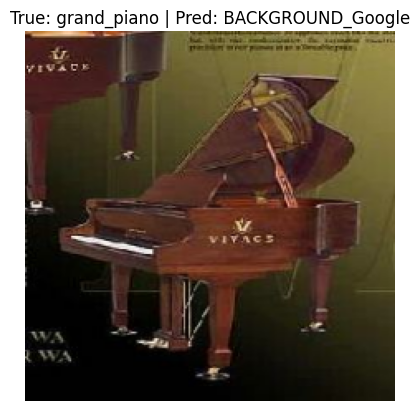

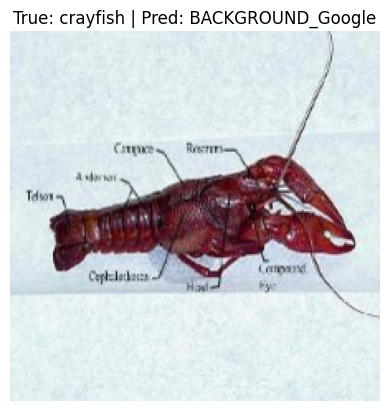

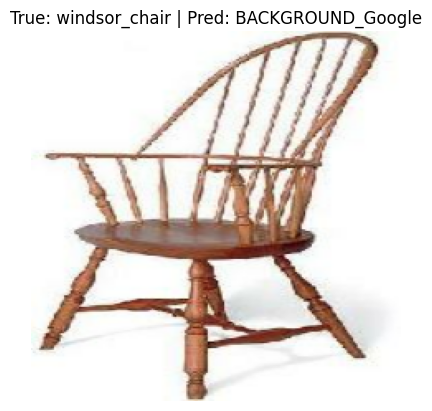

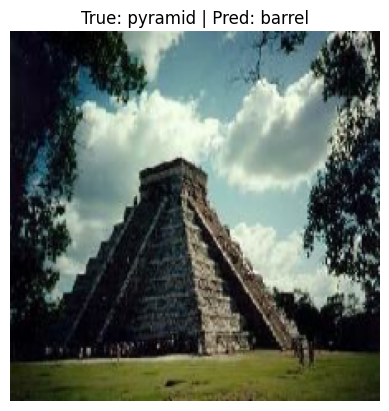

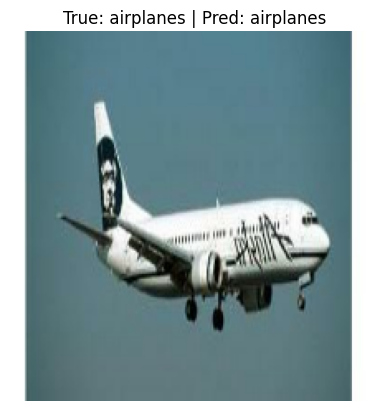

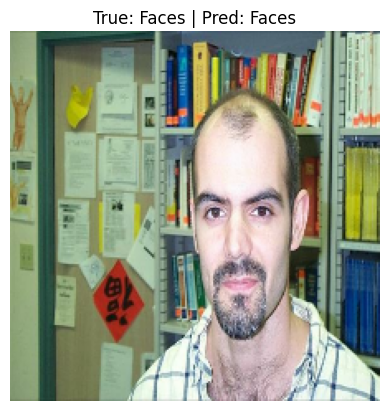

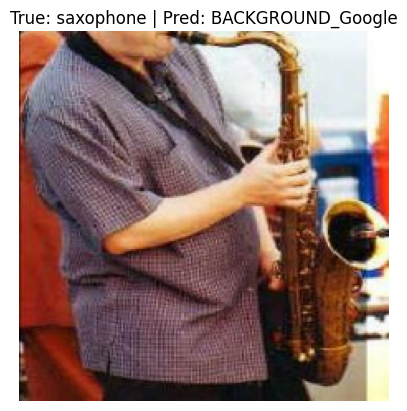

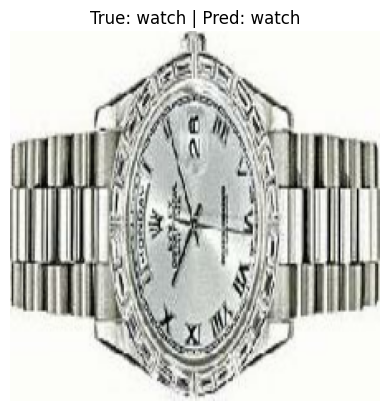

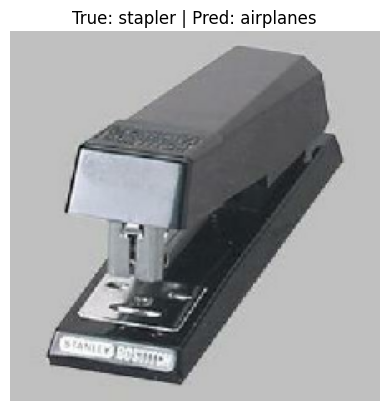

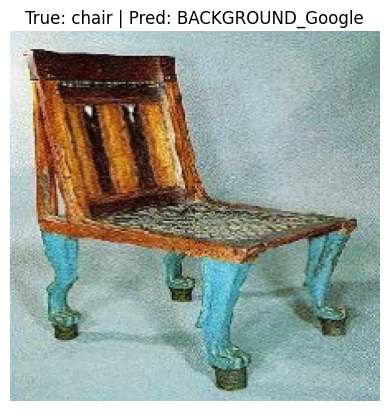

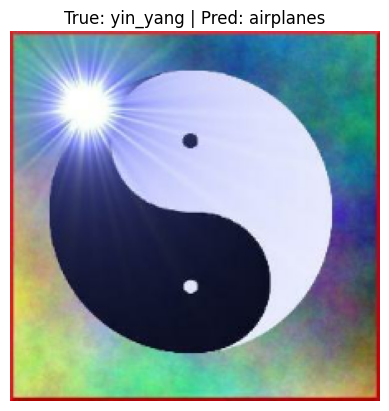

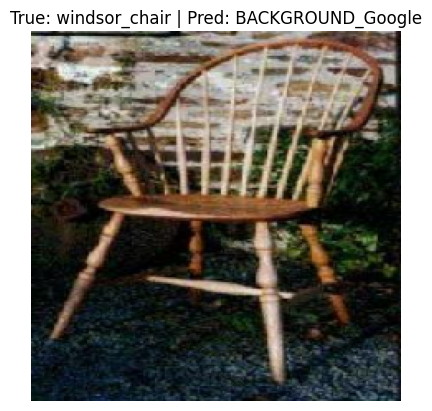

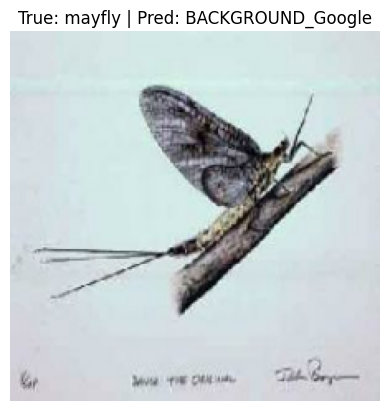

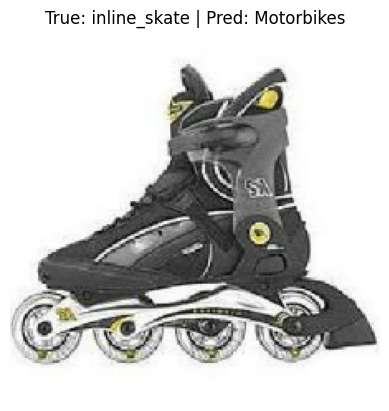

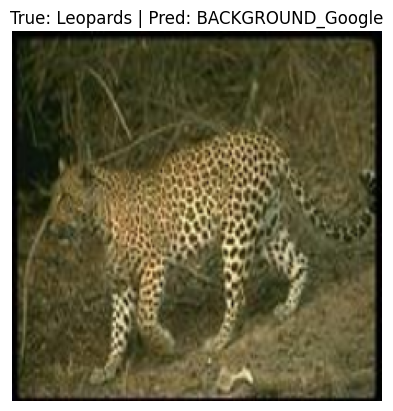

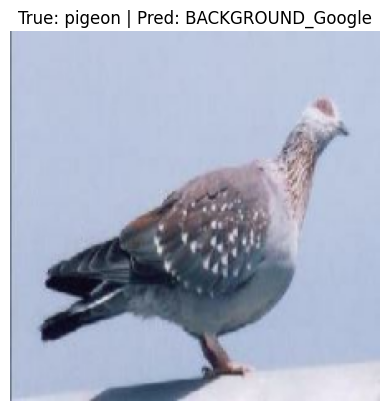

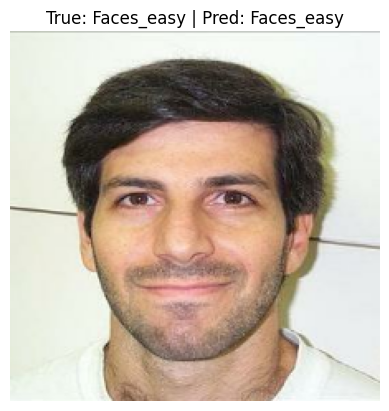

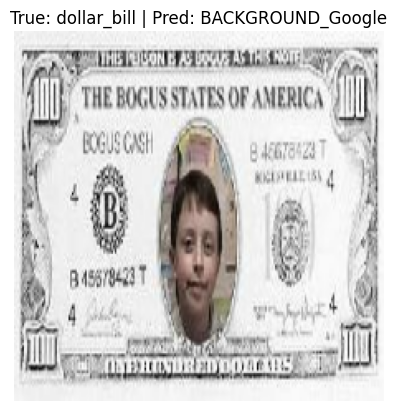

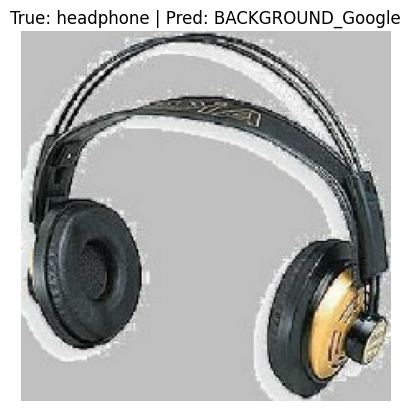

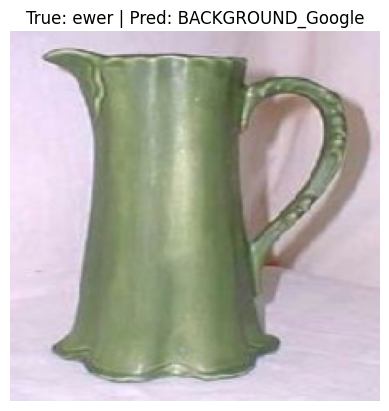

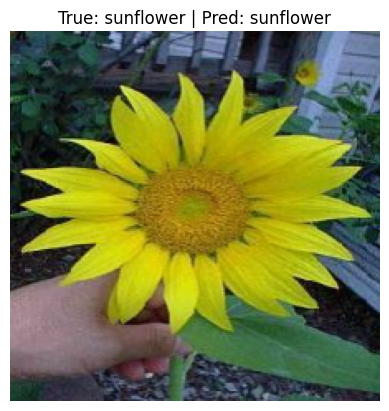

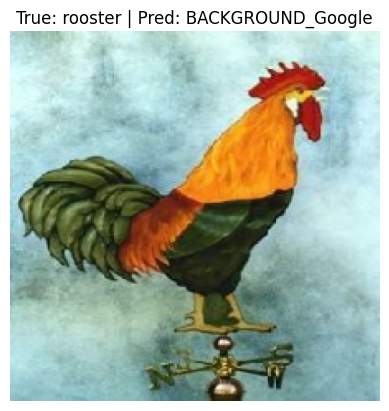

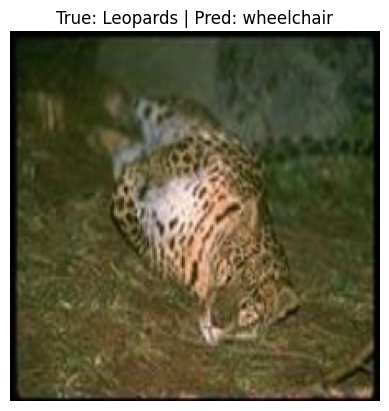

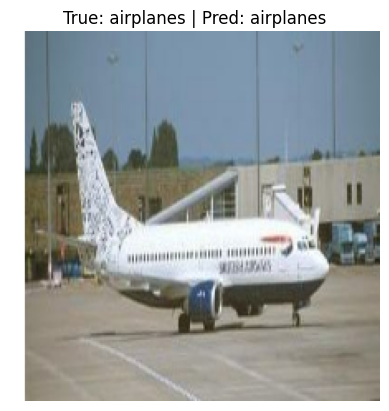

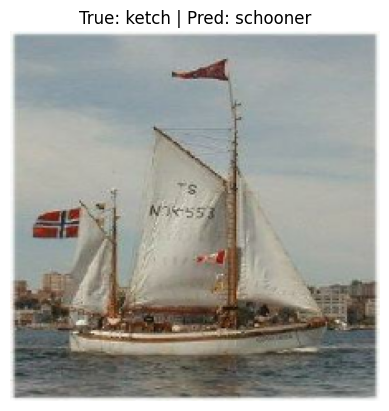

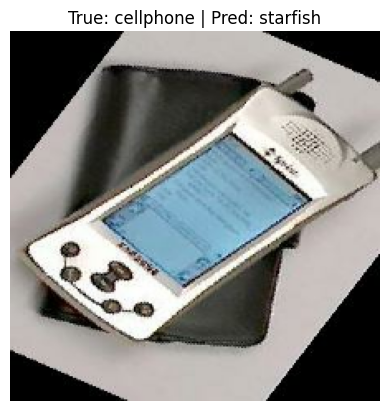

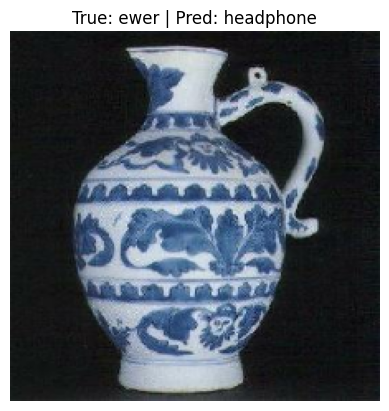

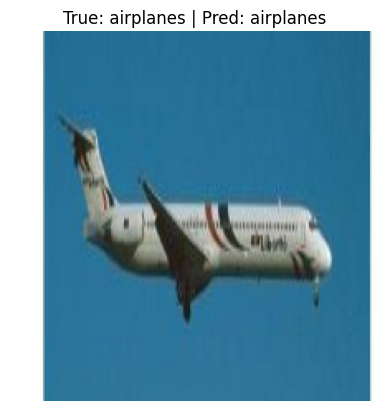

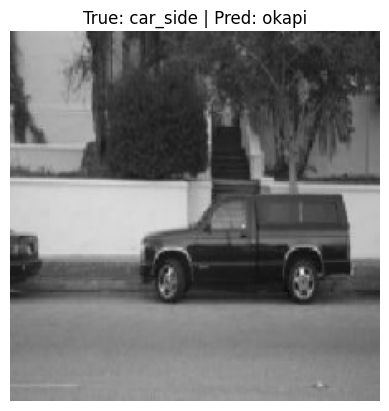

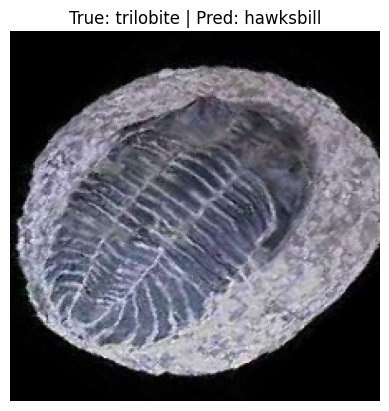

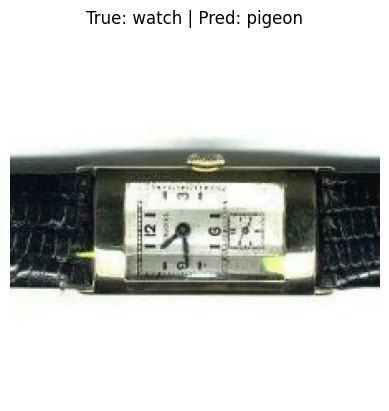

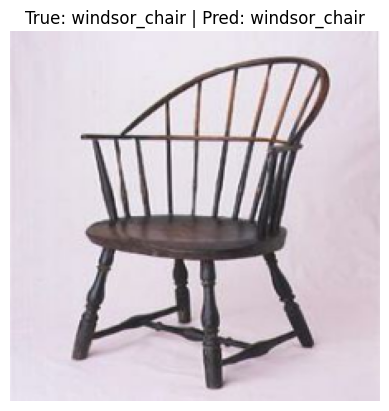

2026-01-19 06:14:06.797140: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [21]:
import numpy as np
import matplotlib.pyplot as plt

for images, labels in train_ds_2.take(1):   # 1 batch yeter
    preds_batch = model.predict(images)     # (batch, 102)
    pred_labels_batch = np.argmax(preds_batch, axis=1)  # ✅ doğru

    for i in range(len(images)):
        plt.imshow(images[i].numpy().astype("uint8"))
        
        true_name = train_ds.class_names[int(labels[i])]
        pred_name = train_ds.class_names[int(pred_labels_batch[i])]
        
        plt.title(f"True: {true_name} | Pred: {pred_name}")
        plt.axis("off")
        plt.show()
